In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import learning_curve

import warnings 
warnings.filterwarnings('ignore')

In [2]:
#import dataset
df = pd.read_csv('CustomerChurn.csv')

In [3]:
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes


In [4]:
df.tail()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
995,996,42,Male,41,37.14,Month-to-Month,Fiber Optic,1522.74,Yes,Yes
996,997,62,Male,9,80.93,Month-to-Month,NaN,728.37,No,Yes
997,998,51,Female,15,111.72,Month-to-Month,Fiber Optic,1675.80,Yes,Yes
998,999,39,Male,68,65.67,One-Year,NaN,4465.56,No,Yes
999,1000,50,Male,1,56.67,Month-to-Month,NaN,56.67,No,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB


In [6]:
df.describe()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,44.674000,18.97300,74.391290,1404.364060
std,288.819436,9.797741,18.89257,25.712083,1571.755048
min,1.000000,12.000000,0.00000,30.000000,0.000000
25%,250.750000,38.000000,5.00000,52.357500,345.217500
50%,500.500000,45.000000,13.00000,74.060000,872.870000
75%,750.250000,51.000000,26.00000,96.102500,1900.175000
max,1000.000000,83.000000,122.00000,119.960000,12416.250000


In [7]:
df.isnull().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
MonthlyCharges       0
ContractType         0
InternetService    297
TotalCharges         0
TechSupport          0
Churn                0
dtype: int64

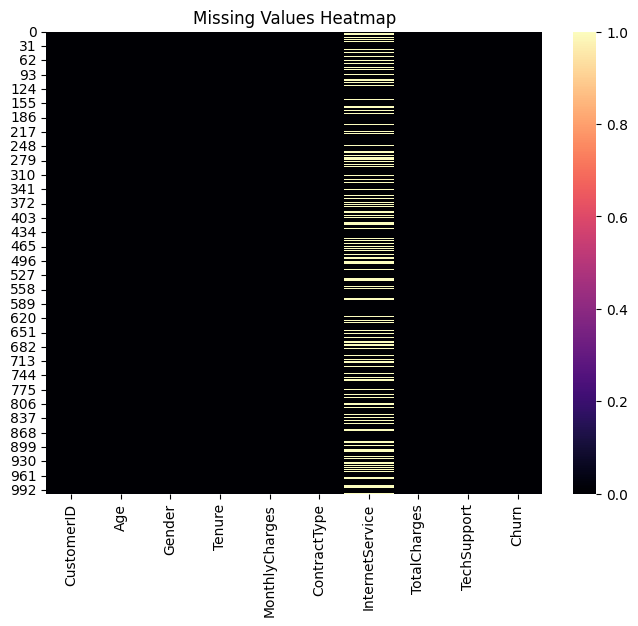

In [8]:
plt.figure(figsize=(8,6))
sns.heatmap(df.isnull(), cmap='magma')
plt.title('Missing Values Heatmap')
plt.show()

In [9]:
print(df.columns)

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'MonthlyCharges',
       'ContractType', 'InternetService', 'TotalCharges', 'TechSupport',
       'Churn'],
      dtype='object')


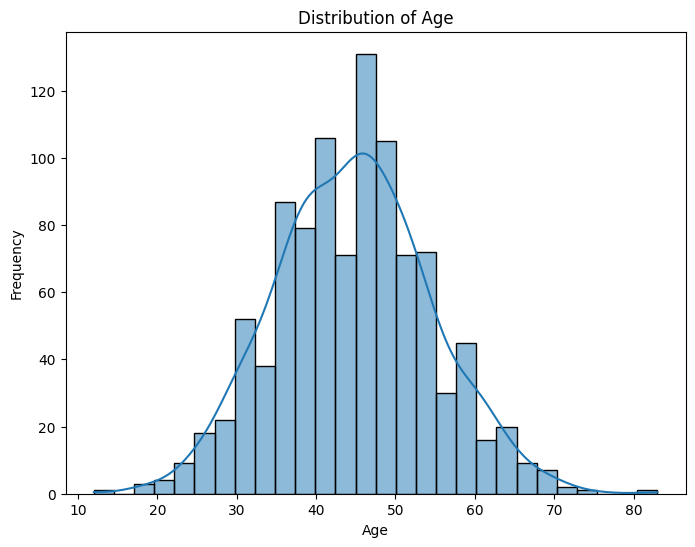

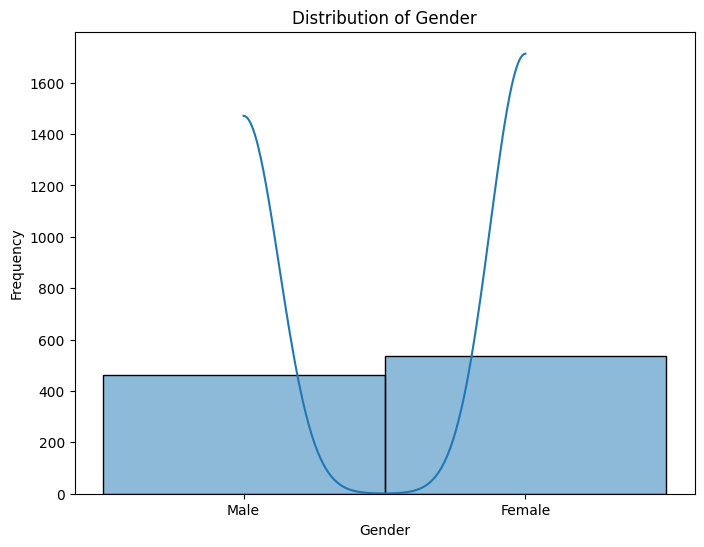

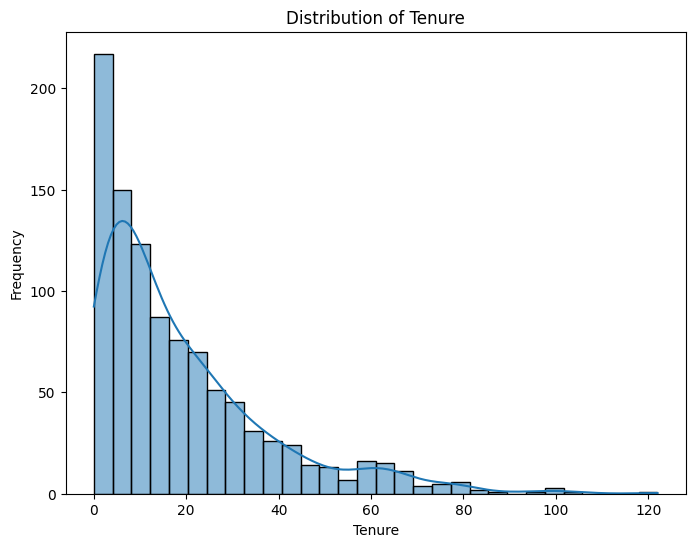

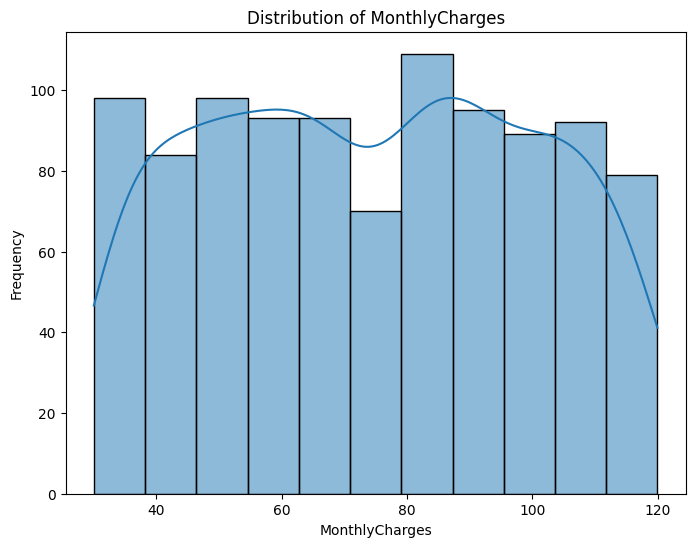

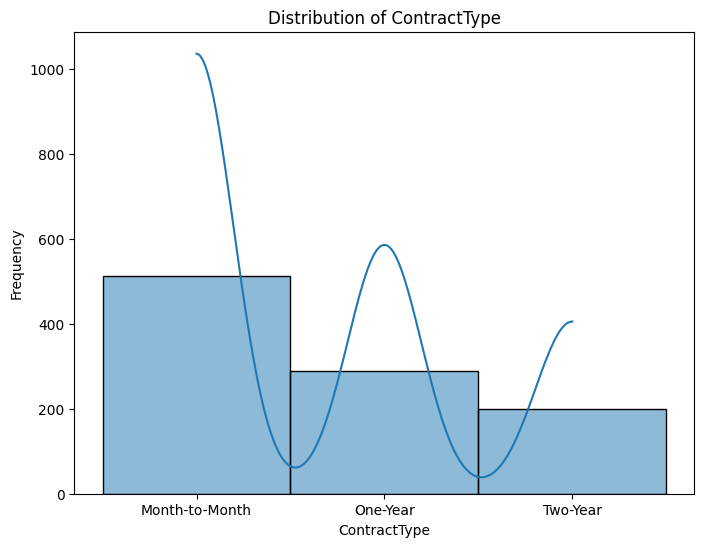

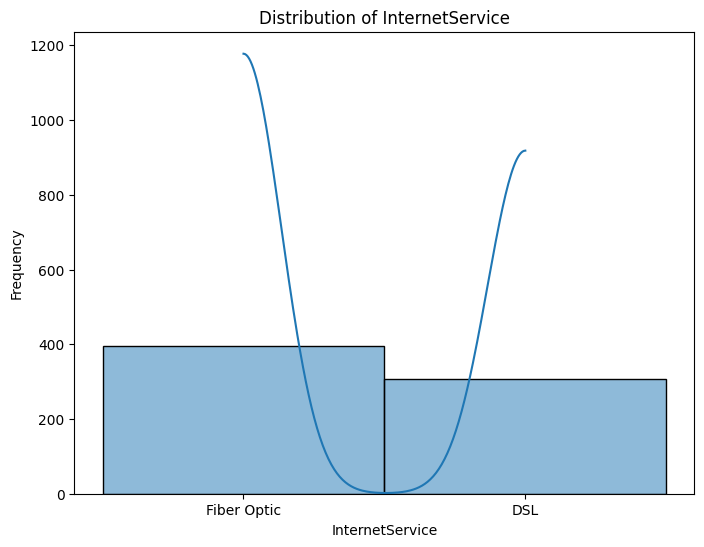

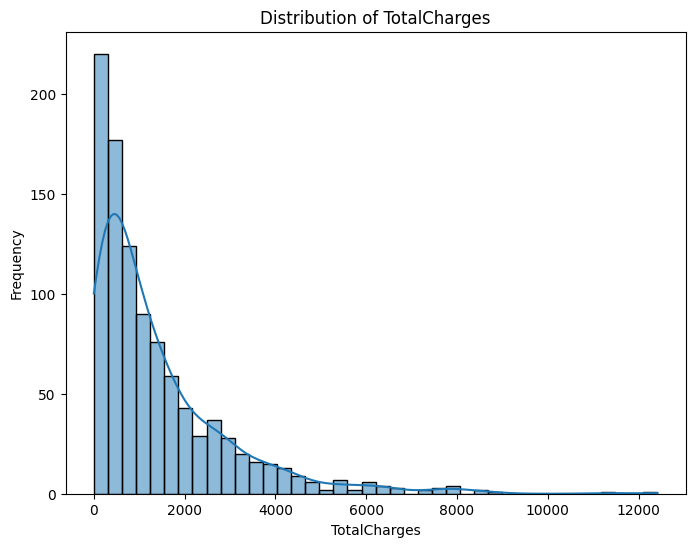

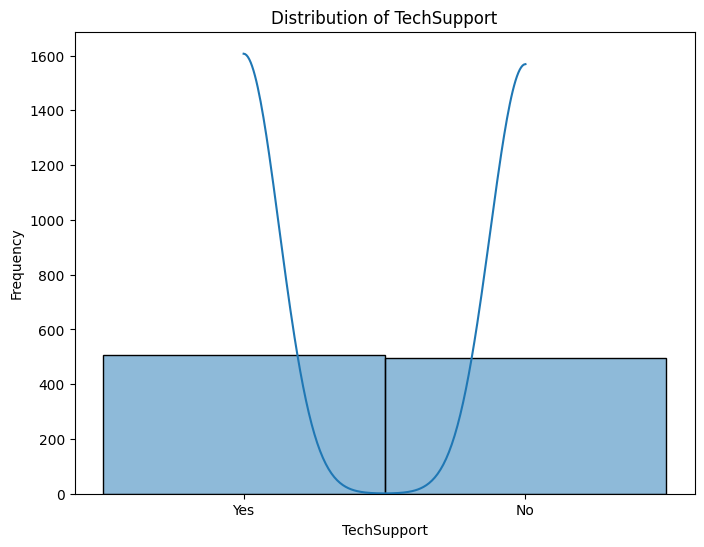

In [10]:
for col in df.columns:
  if col not in ['CustomerID', 'Churn']:
    plt.figure(figsize=(8,6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

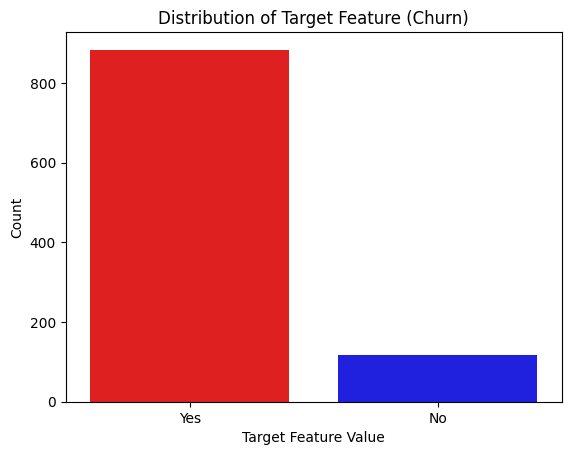

Churn
Yes    883
No     117
Name: count, dtype: int64


In [11]:
sns.countplot(x='Churn', data=df, palette={'No': 'blue', 'Yes': 'red'})

plt.title('Distribution of Target Feature (Churn)')
plt.xlabel('Target Feature Value')
plt.ylabel('Count')

plt.show()
print(df['Churn'].value_counts())


In [12]:
most_freqeunt_internet_service = df['InternetService'].mode()[0]
df['InternetService'].fillna(most_freqeunt_internet_service, inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  1000 non-null   object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB


In [14]:
le =LabelEncoder()

for column in ['Gender', 'ContractType', 'InternetService', 'TechSupport']:
  df[column] = le.fit_transform(df[column])

  #Encode 'Churn' column as binary
df['Churn'] = df['Churn'].map({'Yes':1, 'No':0})

In [15]:
print(df)

     CustomerID  Age  Gender  Tenure  MonthlyCharges  ContractType  \
0             1   49       1       4           88.35             0   
1             2   43       1       0           36.67             0   
2             3   51       0       2           63.79             0   
3             4   60       0       8          102.34             1   
4             5   42       1      32           69.01             0   
..          ...  ...     ...     ...             ...           ...   
995         996   42       1      41           37.14             0   
996         997   62       1       9           80.93             0   
997         998   51       0      15          111.72             0   
998         999   39       1      68           65.67             1   
999        1000   50       1       1           56.67             0   

     InternetService  TotalCharges  TechSupport  Churn  
0                  1        353.40            1      1  
1                  1          0.00           

In [16]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'MonthlyCharges',
       'ContractType', 'InternetService', 'TotalCharges', 'TechSupport',
       'Churn'],
      dtype='object')

In [17]:
pip install --upgrade imbalanced-learn

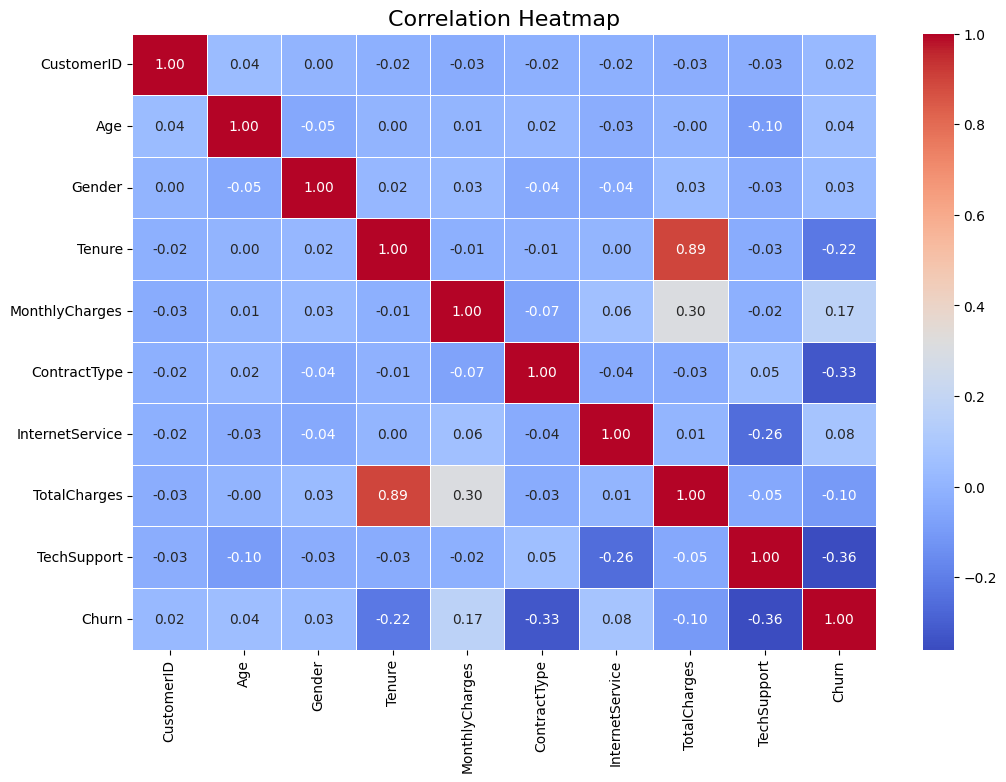

In [18]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))  # Set the size of the plot
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add title and labels
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

Churn is the target variable. Key correlations with Churn:

    -0.217675 with Tenure: A moderate negative correlation, as mentioned earlier, showing that customers with a longer tenure are less likely to churn.
    0.167773 with MonthlyCharges: A weak positive correlation, indicating that customers with higher monthly charges might be more likely to churn.
    -0.327041 with ContractType: A moderate negative correlation, implying that customers with longer contracts are less likely to churn.
    -0.359667 with TechSupport: A moderate negative correlation, meaning customers with tech support are less likely to churn.

Actionable Insights:

    Tenure and Churn: Customers who have been with the company longer are less likely to churn. Focusing on retaining newer customers might be important.
    Contract Type: Customers with longer contracts might be more loyal, so the focus should be on those with month-to-month contracts.
    Tech Support: Offering tech support might be a factor that helps reduce churn, so prioritizing customer support could be beneficial.

In [19]:
x = df.drop(['CustomerID', 'Churn'], axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=42)

smoteen = SMOTEENN(random_state=42)

X_resampled, y_resampled = smoteen.fit_resample(X_train, y_train)

print("Original class distribution:")
print(y_train.value_counts())
print("'\nResampled class distribution:")
print(y_resampled.value_counts())

#Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_resampled, y_resampled)

y_pred = model.predict(X_test)

print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_pred))

Original class distribution:
Churn
1    622
0     78
Name: count, dtype: int64
'
Resampled class distribution:
Churn
0    445
1    374
Name: count, dtype: int64

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        39
           1       1.00      1.00      1.00       261

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



[[ 38   1]
 [  1 260]]


<Axes: >

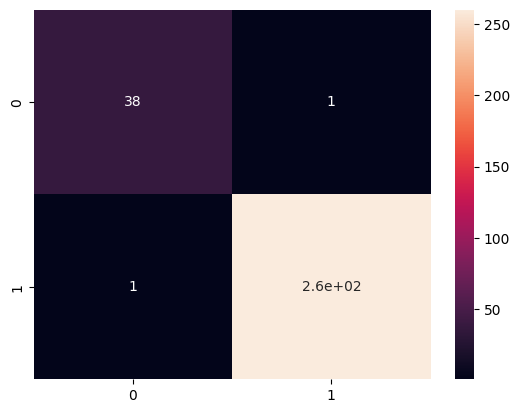

In [20]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

sns.heatmap(cm, annot=True)

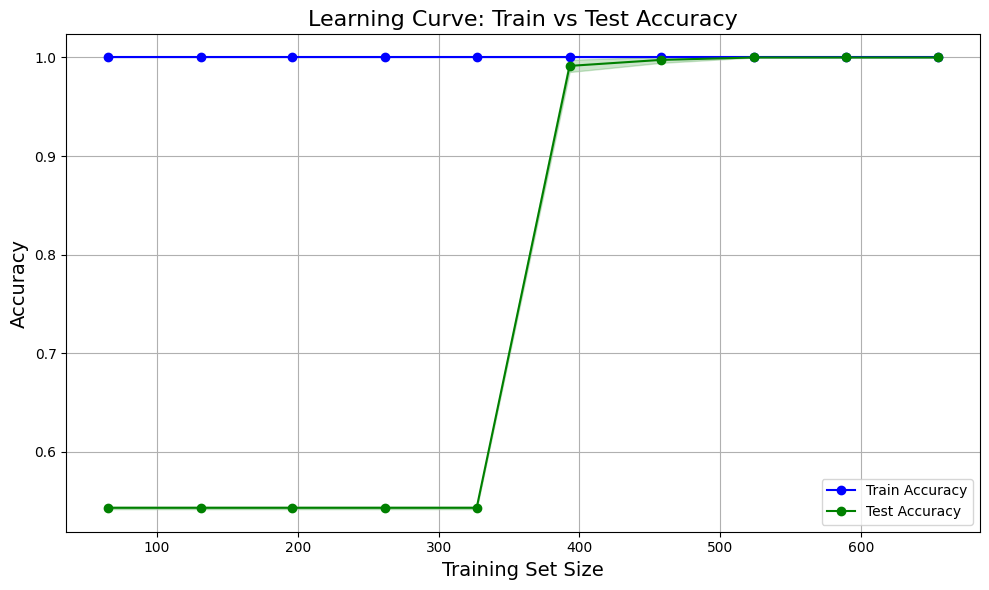

In [21]:
# Calculate learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    model, X_resampled, y_resampled, cv=5,  # Cross-validation splits
    n_jobs=-1, train_sizes=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
)

# Calculate the mean and standard deviation for training and test scores
train_mean = train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
test_mean = test_scores.mean(axis=1)
test_std = test_scores.std(axis=1)

# Plotting the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', label='Train Accuracy')
plt.plot(train_sizes, test_mean, color='green', marker='o', label='Test Accuracy')

# Plotting the fill for std deviation (shaded region)
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.2)

# Labels and title
plt.title('Learning Curve: Train vs Test Accuracy', fontsize=16)
plt.xlabel('Training Set Size', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend(loc='best')  # Add the legend at the best location
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()
